# Assignement 1: Ford-Fulkerson Implementation and Analysis
## Objectives
1. Implement the Ford-Fulkerson method.
2. Conduct empirical experiments with networks of various sizes.
3. Analyze and compare execution times with theoretical complexity.
4. Create figures to illustrate your results.

## Method Implementation
This section is focused on implementing Ford-Fulkerson Method using Breath-First Search.

In [3]:
# Edge representation
mutable struct Edge
    u::Int
    v::Int
    flow::Int
    capacity::Int
end

# Graph representation
mutable struct MyGraph
    adj::Dict{Int, Vector{Edge}}
end

# Function for adding edge to the graph
function add_edge!(graph::MyGraph, u::Int, v::Int, capacity::Int)
    if !haskey(graph.adj, u)
        graph.adj[u] = Vector{Edge}()
    end
    
    if !haskey(graph.adj, v)
        graph.adj[v] = Vector{Edge}()
    end

    push!(graph.adj[u], Edge(u, v, 0, capacity))
    push!(graph.adj[v], Edge(v, u, 0, 0))
end

# BFS path-seeking algorithm
function bfs(graph::MyGraph, source::Int, sink::Int)
    visited = Dict{Int, Bool}()
    pi = Dict{Int, Edge}()
    queue = [source]
    visited[source] = true
    min_capacity = Dict{Int, Int}()
    min_capacity[source] = typemax(Int)
    
    while !isempty(queue)
        u::Int = popfirst!(queue)
        
        for edge::Edge in graph.adj[u]
            v::Int = edge.v
            res_capacity::Int = edge.capacity - edge.flow
            
            if !get(visited, v, false) && res_capacity > 0
                visited[v] = true
                pi[v] = edge
                min_capacity[v] = min(min_capacity[u], res_capacity)
                
                if v == sink
                    return true, pi, min_capacity[sink]
                end
                
                push!(queue, v)
            end
        end
    end
    
    return false, Dict{Int, Edge}(), 0
end



# Updating graph based on found path
function update_graph!(graph::MyGraph, pi::Dict{Int, Edge}, flow::Int)
    v = maximum(keys(pi))
    
    while haskey(pi, v)
        edge = pi[v]
        
        # Update forward edge flow
        for e in graph.adj[edge.u]
            if e.u == edge.u && e.v == edge.v
                e.flow += flow
                break
            end
        end
        
        # Update backward edge flow
        for e in graph.adj[edge.v]
            if e.u == edge.v && e.v == edge.u
                e.flow -= flow
                break
            end
        end
        
        v = edge.u
    end
end

update_graph! (generic function with 1 method)

In [4]:
# Ford-fulkerson method using bfs
function ford_fulkerson(graph::MyGraph, source::Int, sink::Int)
    max_flow = 0
    
    while true
        found, path, flow = bfs(graph, source, sink)
        
        if !found
            break
        end

        update_graph!(graph, path, flow)
        max_flow += flow
    end
    
    return max_flow
end

ford_fulkerson (generic function with 1 method)

In [5]:
# Simple test if the method is working fine on known example
graph = MyGraph(Dict{Int, Vector{Edge}}())

# Example from Introduction to Algorithms page 678
# Expected result: max_flow = 23
add_edge!(graph, 0, 1, 16)
add_edge!(graph, 0, 2, 13)
add_edge!(graph, 2, 1, 4)
add_edge!(graph, 1, 3, 12)
add_edge!(graph, 3, 2, 9)
add_edge!(graph, 2, 4, 14)
add_edge!(graph, 4, 3, 7)
add_edge!(graph, 4, 5, 4)
add_edge!(graph, 3, 5, 20)

max_flow = ford_fulkerson(graph, 0, 5)
println("Max Flow: ", max_flow)

Max Flow: 23


## Experiments setup
This section is focused on experiments about time complexity of ford-fulkerson method

In [7]:
function generate_connected_graph(n::Int, m::Int, source::Int, sink::Int) # where n are nodes and m are edges
    graph = MyGraph(Dict{Int, Vector{Edge}}())

    # Line from source to sink
    for i in 1:n-1
        add_edge!(graph, i, i+1, rand(1:15))
    end

    # Add random edges to the graph
    for _ in 1:m - (n - 1)
        u, v = rand(1:n), rand(1:n)
        capacity = rand(1:10)
        
        # Avoid self-loops
        if u != v && !any(e -> e.u == u && e.v == v, graph.adj[u])
            add_edge!(graph, u, v, capacity)
        end
    end

    return graph
end

generate_connected_graph (generic function with 1 method)

In [8]:
# using BenchmarkTools
# using Statistics
# using Plots

# function measure_time(graph::MyGraph, source::Int, sink::Int; instances::Int=10)
#     instance_times = [@elapsed ford_fulkerson(deepcopy(graph), source, sink) for _ in 1:instances]
#     total_time = sum(instance_times)
#     avg_time = mean(instance_times)
#     return avg_time, total_time, instance_times
# end

# function find_graph_sizes()
#     source = 1
#     max_total_time = 420  # 7 minutes
#     times = Float64[]
#     sizes = Int[]

#     last_size = 5000
#     while last_size < 15000000 # 15mln nodes
#         next_size = Int(round(last_size * 1.5))  # Increase size progressively
#         graph = generate_connected_graph(next_size, 3*next_size, source, next_size)
#         avg_time, total_time, instance_times = measure_time(graph, source, next_size)

#         if total_time > max_total_time
#             println("Computation of 10 instances for graph $next_size exceeded 7 minutes")
#             break
#         end

#         push!(times, avg_time)
#         push!(sizes, next_size)
#         last_size = next_size
#         println("Size: $next_size | Average time: $avg_time sec | Total time: $total_time sec | \nTimes: $instance_times\n")
#     end

#     return sizes, times
# end

# # Run experiment and plot
# sizes, times = find_graph_sizes()
# plot(sizes, times, label="Execution Time", xlabel="Graph Size", ylabel="Time (sec)", title="Ford-Fulkerson Performance")
# plot!(xscale=:log10, minorgrid=true)

* Now it is known that computing time of 10 instanced of around 1 milion nodes takes around 7 minutes.
* This is threshold set for maximum number of nodes.

Size: 100 | Instances: 12835 | Avg time: 0.00063412394234515 sec | Total time: 8.1389808 sec

            Instance times: [0.0007186, 0.0005416, 0.0006413, 0.0009012, 0.0007266, 0.000654, 0.0007981, 0.000539, 0.000635, 0.0005307, 0.0006027, 0.0005449, 0.0006002, 0.0005266, 0.0006136, 0.0005418, 0.0006499, 0.0006044, 0.0006334, 0.0005411, 0.0006383, 0.0006092, 0.0005471, 0.0006442, 0.0005403, 0.0006254, 0.0005373, 0.0006023, 0.0006086, 0.0007242, 0.0007388, 0.0007084, 0.0005535, 0.0006518, 0.0005395, 0.0006056, 0.000536, 0.0006178, 0.0005492, 0.0006742, 0.0008117, 0.0006432, 0.0005356, 0.0006302, 0.0005337, 0.0006223, 0.0006258, 0.000549, 0.0006088, 0.0005421, 0.0007051, 0.0006886, 0.0006176, 0.0005625, 0.0007248, 0.0006257, 0.0007498, 0.0008502, 0.0006157, 0.0005524, 0.00073, 0.0006789, 0.0006388, 0.0005468, 0.0006147, 0.0005537, 0.0734021, 0.000554, 0.0005994, 0.0005463, 0.0005486, 0.0006494, 0.0005539, 0.0008817, 0.0012849, 0.0014051, 0.0013535, 0.0012637, 0.0014149, 0.0012469, 0.000

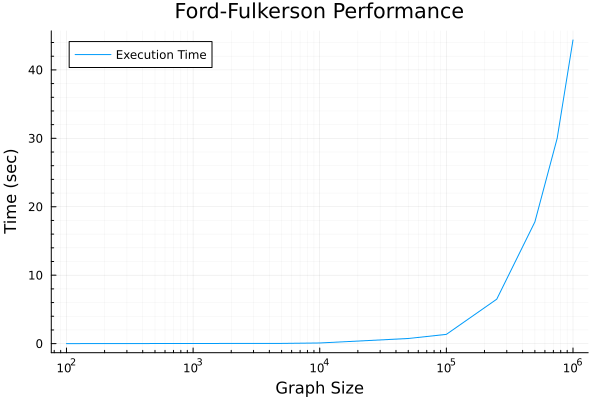

In [10]:
using BenchmarkTools
using Statistics
using Plots

function estimate_instances(graph::MyGraph, source::Int, sink::Int, target_time::Float64=420.0)
    test_instances = 3
    instance_times = [@elapsed ford_fulkerson(deepcopy(graph), source, sink) for _ in 1:test_instances]
    avg_time = mean(instance_times)

    # Estimate total instances to reach target_time
    estimated_instances = max(1, Int(round(target_time / avg_time)))
    
    return estimated_instances
end

function measure_time_updated(graph::MyGraph, source::Int, sink::Int, target_time::Float64=420.0)
    instances = estimate_instances(graph, source, sink, target_time)
    instance_times = [@elapsed ford_fulkerson(deepcopy(graph), source, sink) for _ in 1:instances]
    total_time = sum(instance_times)
    avg_time = mean(instance_times)

    return avg_time, total_time, instances, instance_times
end

function find_graph_sizes_onehour()
    source = 1
    times = Float64[]
    sizes_vec = [100, 5000, 10000, 50000, 100000, 250000, 500000, 750000, 1000000]
    
    for size in sizes_vec
        graph = generate_connected_graph(size, 3*size, source, size)
        avg_time, total_time, instances, instance_times = measure_time_updated(graph, source, size)

        push!(times, avg_time)
        println("Size: $size | Instances: $instances | Avg time: $avg_time sec | Total time: $total_time sec\n
            Instance times: $instance_times")
    end

    return sizes_vec, times
end

sizes, times = find_graph_sizes_onehour()
plot(sizes, times, label="Execution Time", xlabel="Graph Size", ylabel="Time (sec)", title="Ford-Fulkerson Performance", xscale=:log10, minorgrid=true)